### Import packages

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Assign dataframes of CCs, BBs and planning areas

In [47]:
df_cc = pd.read_csv("CommunityClubsTest-clean.csv")
df_bb = pd.read_csv("HSA bloodbank coordinates1.csv")
df_pa = pd.read_csv("C:/Users/65816/Downloads/Telegram Desktop/planning_area_population.csv")

### Plot the map

C:\Users\65816\AppData\Local\Temp\ipykernel_38556\2331029962.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


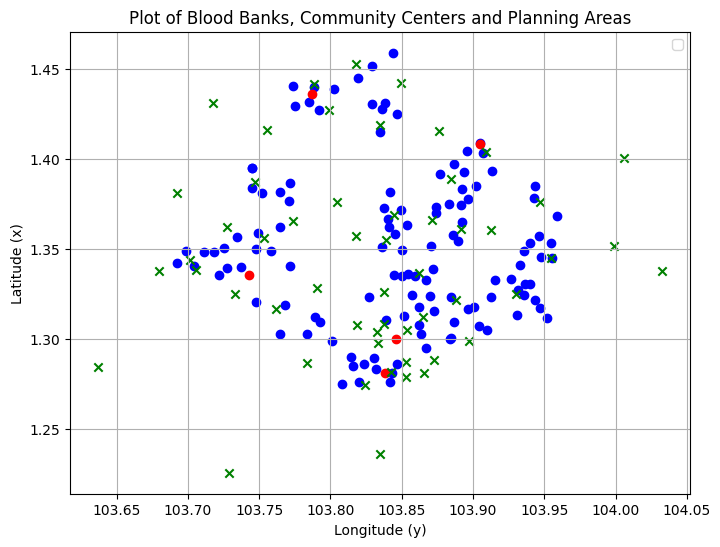

In [48]:
plt.figure(figsize=(8, 6))

#Plot Community Centres
plt.scatter(df_cc['X'], df_cc['Y'], color='blue', marker='o')

#PLot Bloodbanks
plt.scatter(df_bb['Longitude'], df_bb['Latitude'], color='red', marker='o')

#Plot Planning areas
plt.scatter(df_pa['Longitude (Y)'], df_pa['Latitude (X)'], color='green', marker='x')

plt.xlabel("Longitude (y)")
plt.ylabel("Latitude (x)")
plt.legend()
plt.title("Plot of Blood Banks, Community Centers and Planning Areas")
plt.grid(True)
plt.show()


### Assigning each CC to a region

In [49]:
# Create copy to store region
df_cc['Nearest Planning Area'] = None
df_cc['Distance to PA'] = np.inf

# Loop through planning areas to assign distances
for i, cc in df_cc.iterrows():
    cc_coords = np.array([cc['X'], cc['Y']])
    
    # Calculate distance to each planning area
    distances = np.sqrt(
        (df_pa['Longitude (Y)'] - cc_coords[0])**2 +
        (df_pa['Latitude (X)'] - cc_coords[1])**2
    )
    
    # Find nearest planning area
    nearest_index = distances.idxmin()
    df_cc.at[i, 'Nearest Planning Area'] = df_pa.loc[nearest_index, 'Planning Area']
    df_cc.at[i, 'Distance to PA'] = distances[nearest_index]


# View the newest update
print(df_cc[['X', 'Y', 'Nearest Planning Area', 'Distance to PA']])

              X         Y Nearest Planning Area  Distance to PA
0    103.792241  1.427493                Mandai        0.006825
1    103.889546  1.354658               Hougang        0.006601
2    103.886666  1.397128              Sengkang        0.008592
3    103.840668  1.366833            Ang Mo Kio        0.004062
4    103.747540  1.320799              Clementi        0.014526
..          ...       ...                   ...             ...
120  103.737066  1.339973           Jurong East        0.015604
121  103.771521  1.386807         Bukit Panjang        0.021324
122  103.933010  1.341263                 Bedok        0.016521
123  103.952223  1.311728                 Bedok        0.025526
124  103.727300  1.339360           Jurong East        0.015742

[125 rows x 4 columns]


In [50]:
df_pa['Total Population'] = df_pa['Total Population'].replace('-', 0)
df_pa['Total Population'] = df_pa['Total Population'].astype(int)
# Calculate population distribution
population_distribution = df_cc.groupby('Nearest Planning Area').size().reset_index(name='Community Centres')
# Merge with planning area population
population_distribution = population_distribution.merge(
    df_pa[['Planning Area', 'Total Population']],
    left_on='Nearest Planning Area',
    right_on='Planning Area',
    how='left'
)
# Calculate population per community centre
population_distribution['Population per Community Centre'] = (
    population_distribution['Total Population'] / population_distribution['Community Centres']
).astype(int)

# Display the population distribution
print(population_distribution[['Nearest Planning Area', 'Total Population', 'Community Centres', 'Population per Community Centre']])

   Nearest Planning Area  Total Population  Community Centres  \
0             Ang Mo Kio            159340                  6   
1                  Bedok            276840                 12   
2                 Bishan             87930                  3   
3               Boon Lay                20                  2   
4            Bukit Batok            167750                  3   
5            Bukit Merah            148270                  5   
6          Bukit Panjang            138050                  4   
7            Bukit Timah             83570                  3   
8          Choa Chu Kang            190180                  4   
9               Clementi            102390                  3   
10               Geylang            116610                  4   
11               Hougang            228140                  4   
12           Jurong East             74530                  3   
13           Jurong West            257470                  3   
14               Kallang 

In [51]:
population_distribution['Amount of Blood Collected'] = (0.019 * population_distribution['Population per Community Centre'] * (350/500)).astype(int)

print(population_distribution['Amount of Blood Collected'])

# Merge the amount of blood collected per planning area to each CC
df_cc = df_cc.merge(
    population_distribution[['Nearest Planning Area', 'Amount of Blood Collected']],
    on='Nearest Planning Area',
    how='left'
)

# Now each CC has its assigned amount of blood collected
print(df_cc[['X', 'Y', 'Nearest Planning Area', 'Amount of Blood Collected']])

0      353
1      306
2      389
3        0
4      743
5      394
6      459
7      370
8      632
9      453
10     387
11     758
12     330
13    1141
14     267
15      14
16       0
17     155
18     129
19     344
20      55
21     643
22     663
23    1355
24     158
25     171
26     732
27     503
28     521
29       0
30     630
31     319
32      53
33     308
34     848
35     610
Name: Amount of Blood Collected, dtype: int64
              X         Y Nearest Planning Area  Amount of Blood Collected
0    103.792241  1.427493                Mandai                         14
1    103.889546  1.354658               Hougang                        758
2    103.886666  1.397128              Sengkang                        503
3    103.840668  1.366833            Ang Mo Kio                        353
4    103.747540  1.320799              Clementi                        453
..          ...       ...                   ...                        ...
120  103.737066  1.339973        

In [52]:
print(df_cc['Amount of Blood Collected'])

0       14
1      758
2      503
3      353
4      453
      ... 
120    330
121    459
122    306
123    306
124    330
Name: Amount of Blood Collected, Length: 125, dtype: int64


In [53]:
# Save the population distribution to a CSV file
population_distribution.to_csv('population_distribution.csv', index=False)  
# Save the updated community centres with blood collection amounts
df_cc.to_csv('community_centres_with_blood_collection.csv', index=False)    

In [54]:


total_blood_collected = df_cc['Amount of Blood Collected'].sum()
print("Total blood collected from all community centres:", total_blood_collected)
total_blood_collected = (total_blood_collected)
print("Total blood collected from all community centres:", total_blood_collected)

Total blood collected from all community centres: 55310
Total blood collected from all community centres: 55310
